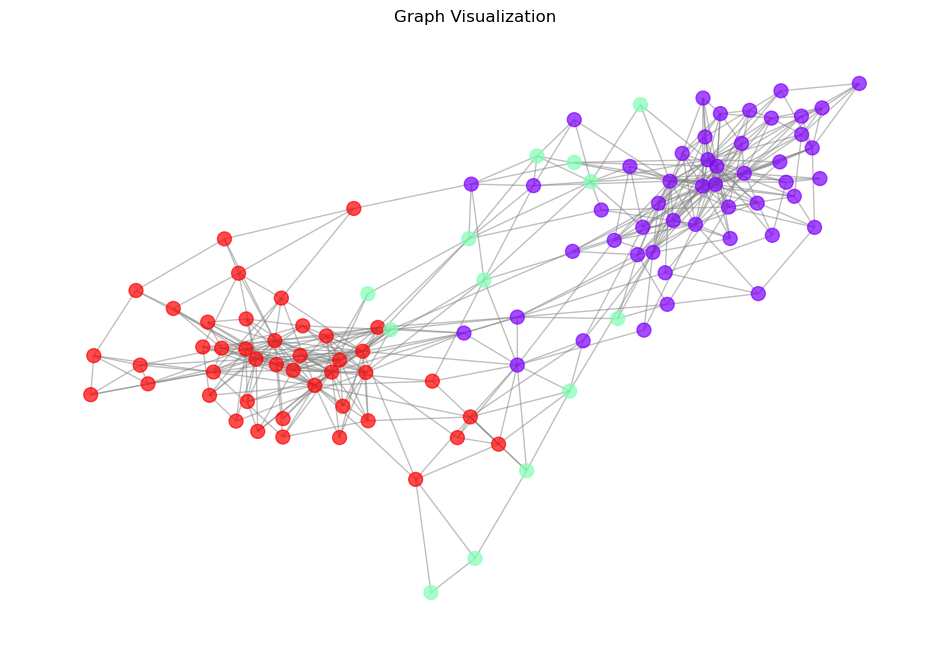

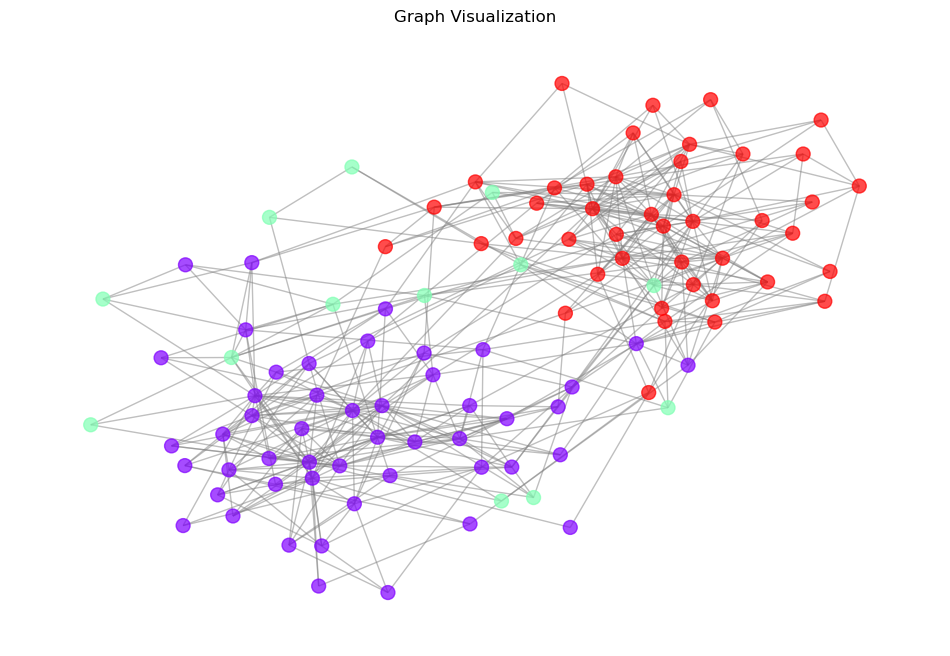

使用ND方法处理后的矩阵分析:
原始矩阵非零元素比例: 0.0800
处理后矩阵非零元素比例: 0.0800
原始矩阵最大值: 1.0000, 最小值: 0.0000
处理后矩阵最大值: 1.0000, 最小值: 0.0000


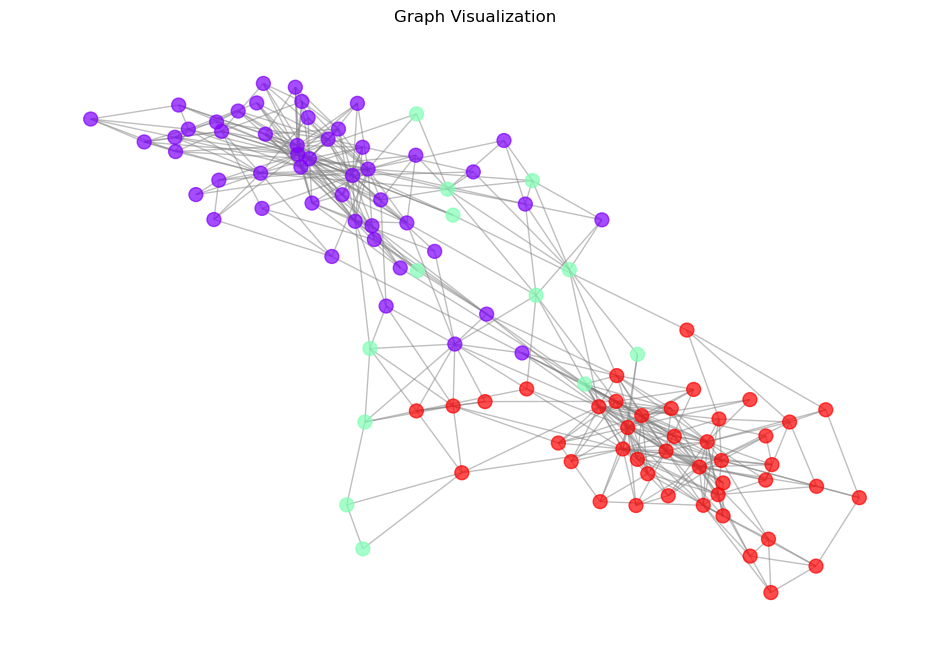

使用NE方法处理后的矩阵分析:
原始矩阵非零元素比例: 0.0800
处理后矩阵非零元素比例: 0.2422
原始矩阵最大值: 1.0000, 最小值: 0.0000
处理后矩阵最大值: 0.4837, 最小值: 0.0000


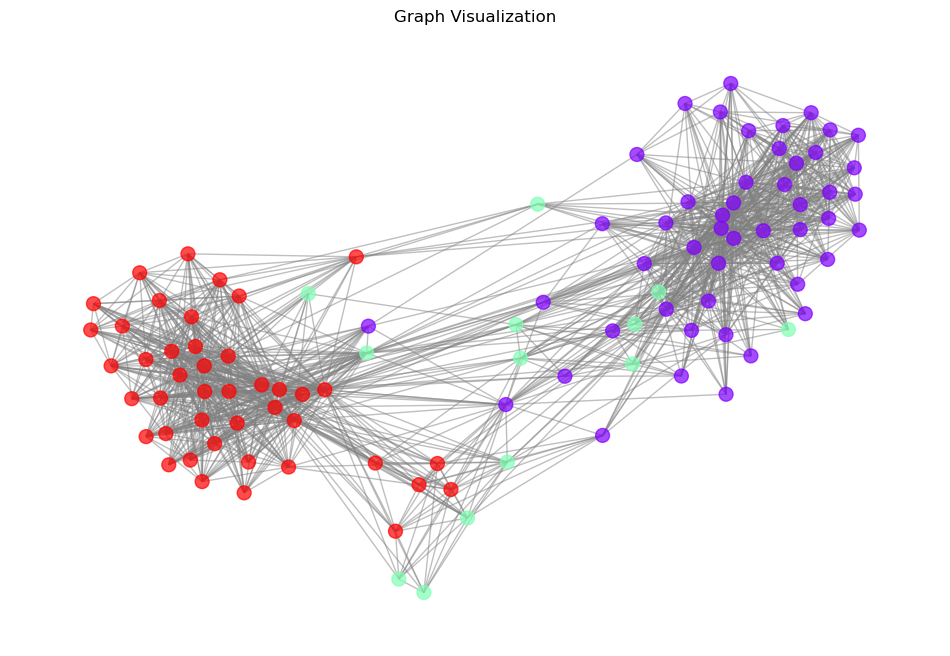

使用NR方法处理后的矩阵分析:
原始矩阵非零元素比例: 0.0800
处理后矩阵非零元素比例: 0.9881
原始矩阵最大值: 1.0000, 最小值: 0.0000
处理后矩阵最大值: 2.0000, 最小值: 0.0000


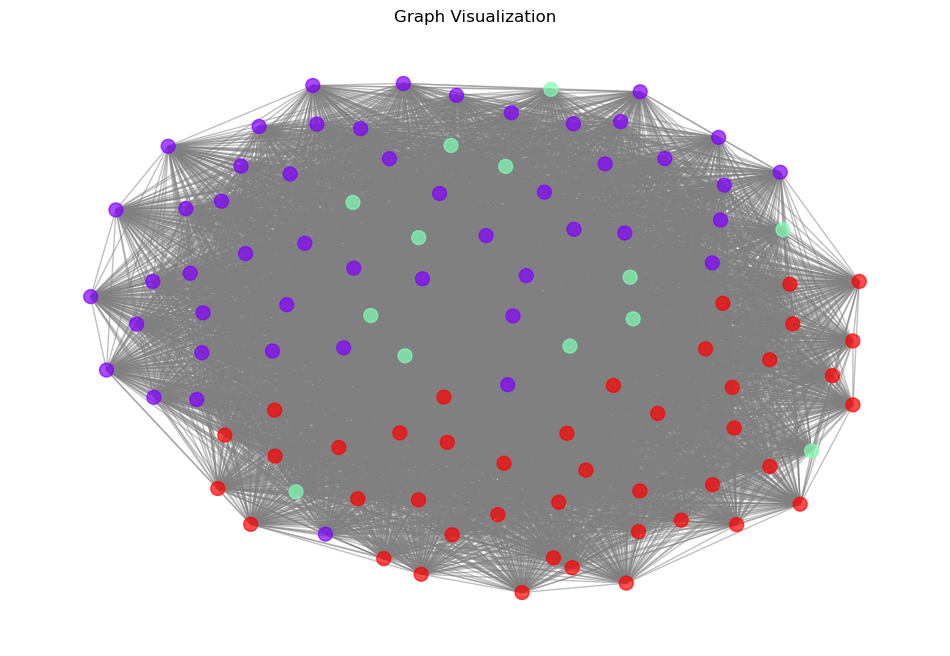

使用ICM方法处理后的矩阵分析:
原始矩阵非零元素比例: 0.0800
处理后矩阵非零元素比例: 0.0131
原始矩阵最大值: 1.0000, 最小值: 0.0000
处理后矩阵最大值: 2.0000, 最小值: 0.0000


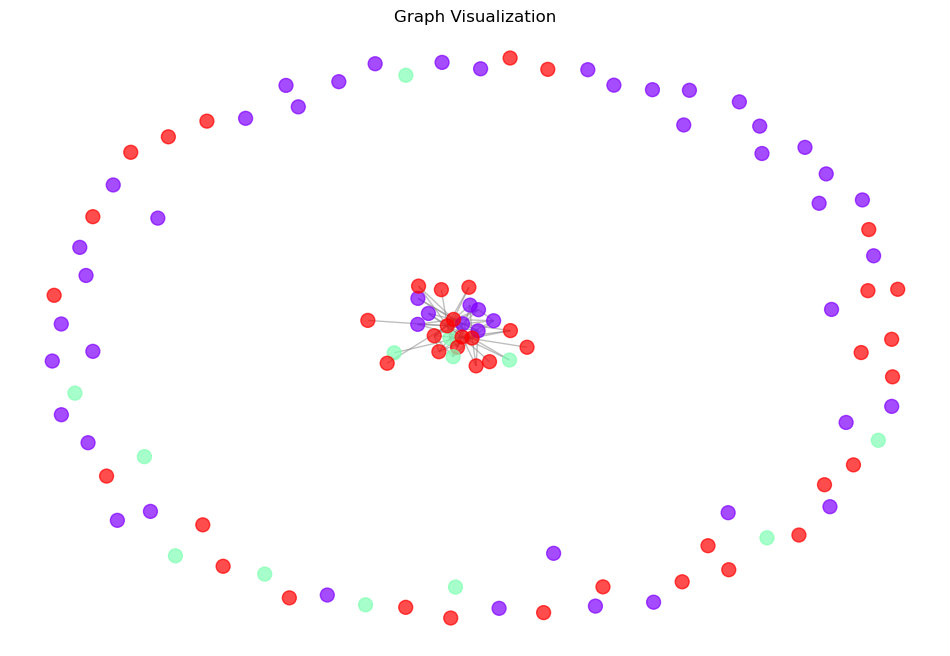

使用Silencer方法处理后的矩阵分析:
原始矩阵非零元素比例: 0.0800
处理后矩阵非零元素比例: 0.5168
原始矩阵最大值: 1.0000, 最小值: 0.0000
处理后矩阵最大值: 1.2785, 最小值: 0.0000


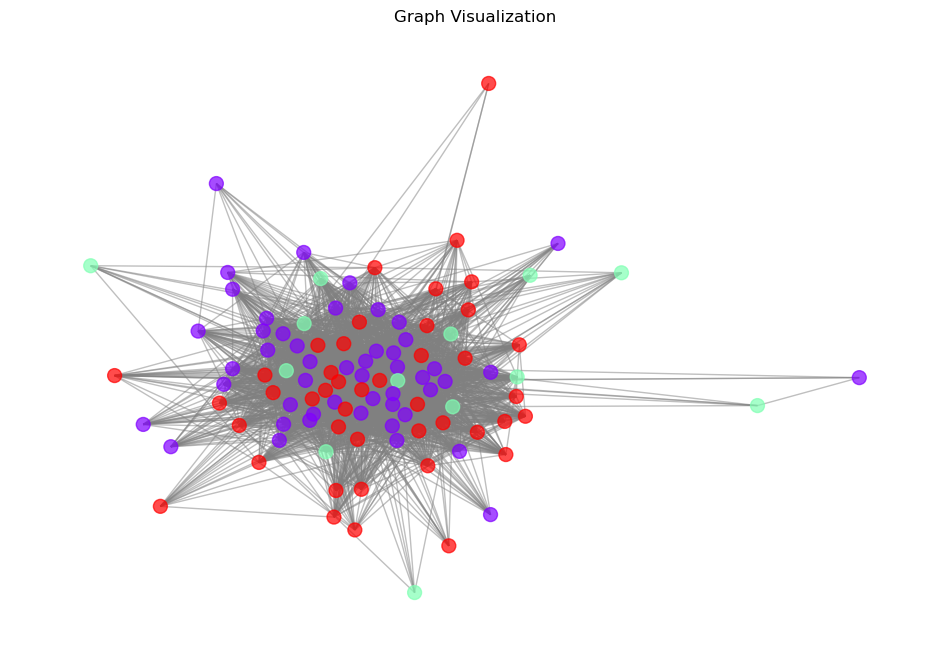

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from network_deconvolution import network_deconvolution
from network_enhancement import network_enhancement
from network_rendor import network_rendor, network_icm, network_silencer

def read_data(dataset, noise_ratio):
    '''读取邻接矩阵和标签'''
    if noise_ratio == 0:
        adj_matrix = np.load(f'{dataset}/adj_matrix.npy')
    else:
        adj_matrix = np.load(f'{dataset}/adj_matrix_{noise_ratio}.npy')
    labels = np.load(f'{dataset}/labels.npy')
    return adj_matrix, labels

def preprocess(dataset, noise_ratio, method="ND"):
    '''预处理数据并分析处理前后的矩阵区别'''
    # 读取原始矩阵
    adj_matrix_orig, labels = read_data(dataset, noise_ratio)
    
    # 根据不同方法处理矩阵
    if method == "NE":
        adj_matrix_new = network_enhancement(adj_matrix_orig)
        adj_matrix_new = sparse_graph(adj_matrix_new)
    elif method == "NR":
        adj_matrix_new = network_rendor(adj_matrix_orig)
        adj_matrix_new = sparse_graph(adj_matrix_new)
    elif method == "ICM":
        adj_matrix_new = network_icm(adj_matrix_orig)
        adj_matrix_new = sparse_graph(adj_matrix_new)
    elif method == "Silencer":
        adj_matrix_new = network_silencer(adj_matrix_orig)
        adj_matrix_new = sparse_graph(adj_matrix_new)
    elif method == "ND":
        adj_matrix_new = network_deconvolution(adj_matrix_orig)
        adj_matrix_new = sparse_graph(adj_matrix_new)
    
    # 分析矩阵变化
    print(f"使用{method}方法处理后的矩阵分析:")
    print(f"原始矩阵非零元素比例: {np.count_nonzero(adj_matrix_orig)/adj_matrix_orig.size:.4f}")
    print(f"处理后矩阵非零元素比例: {np.count_nonzero(adj_matrix_new)/adj_matrix_new.size:.4f}")
    print(f"原始矩阵最大值: {np.max(adj_matrix_orig):.4f}, 最小值: {np.min(adj_matrix_orig):.4f}")
    print(f"处理后矩阵最大值: {np.max(adj_matrix_new):.4f}, 最小值: {np.min(adj_matrix_new):.4f}")
    
    return adj_matrix_new, labels


def sparse_graph(adj_matrix, threshold=0.1):
    '''通过阈值稀疏化图'''
    sparse_matrix = np.where(adj_matrix > threshold, adj_matrix, 0)
    return sparse_matrix



def draw_graph(dataset, noise_ratio, method=None, title="Graph Visualization"):
    """
    绘制网络图，不同类别的节点用不同颜色表示    

    """
    if method == None:
        adj_matrix, labels = read_data(dataset, noise_ratio)
    else:
        adj_matrix, labels = preprocess(dataset, noise_ratio, method)
    # 创建图对象
    G = nx.from_numpy_array(adj_matrix)
    
    # 设置绘图大小
    plt.figure(figsize=(12, 8))
    
    # 使用spring布局
    pos = nx.spring_layout(G)
    
    if labels is not None:
        # 获取唯一的标签
        unique_labels = np.unique(labels)
        # 为每个标签分配不同的颜色
        colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
        # 创建颜色映射
        color_map = dict(zip(unique_labels, colors))
        # 获取每个节点的颜色
        node_colors = [color_map[label] for label in labels]
    else:
        # 如果没有标签，所有节点使用相同颜色
        node_colors = '#1f78b4'
    
    # 绘制节点
    nx.draw_networkx_nodes(G, pos, 
                          node_color=node_colors,
                          node_size=100,
                          alpha=0.7)
    
    # 绘制边
    nx.draw_networkx_edges(G, pos,
                          edge_color='gray',
                          alpha=0.5)
    
    plt.title(title)
    plt.axis('off')
    plt.show()


def main():
    draw_graph('polbooks', 0)
    draw_graph('polbooks', 0.1)
    draw_graph('polbooks', 0, "ND")
    draw_graph('polbooks', 0, "NE")
    draw_graph('polbooks', 0, "NR")
    draw_graph('polbooks', 0, "ICM")
    draw_graph('polbooks', 0, "Silencer")

if __name__ == '__main__':
    main()



# 示例使用:
# draw_graph(adj_matrix, labels, "网络可视化")
